In [11]:
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
api_key = os.getenv("GROQ_API_KEY")

from llama_index.core import Settings
from llama_index.llms.groq import Groq

In [12]:
Settings.llm = Groq(model="llama3-70b-8192",
                    api_key=api_key)

In [13]:
from llama_index.experimental.query_engine import PandasQueryEngine

In [14]:
import pandas as pd

df = pd.read_csv("vendas.csv")

In [15]:
query_engine = PandasQueryEngine(df=df, verbose=True)

In [16]:
response = query_engine.query("Qual é o tipo de produto mais vendido?")

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.tipo_produto.value_counts().index[0]
```
> Pandas Output: Moda


In [9]:
df.tipo_produto.value_counts().index[0]

'Moda'

In [17]:
response = query_engine.query("Qual é a cidade que usou mais Dinheiro como forma de pagamento?")

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.loc[df['forma_pagamento'] == 'Dinheiro', 'cidade'].value_counts().index[0]
```
> Pandas Output: São Caetano


In [18]:
df.loc[df['forma_pagamento'] == 'Dinheiro', 'cidade'].value_counts().index[0]

'São Caetano'

In [19]:
response

Response(response='São Caetano', source_nodes=[], metadata={'pandas_instruction_str': "df.loc[df['forma_pagamento'] == 'Dinheiro', 'cidade'].value_counts().index[0]", 'raw_pandas_output': 'São Caetano'})

### Respostas mais elaboradas

In [20]:
query_engine = PandasQueryEngine(df=df, 
                                 verbose=True,
                                 synthesize_response=True)

In [21]:
response = query_engine.query("Qual é a avaliação média de cada filial?")
response

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.groupby('filial')['avaliacao'].mean()
```
> Pandas Output: filial
A    7.027059
B    6.818072
C    7.072866
Name: avaliacao, dtype: float64
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


Response(response='A avaliação média de cada filial é a seguinte: a filial A tem uma avaliação média de 7.03, a filial B tem uma avaliação média de 6.82 e a filial C tem uma avaliação média de 7.07.', source_nodes=[], metadata={'pandas_instruction_str': "df.groupby('filial')['avaliacao'].mean()", 'raw_pandas_output': 'filial\nA    7.027059\nB    6.818072\nC    7.072866\nName: avaliacao, dtype: float64'})

In [22]:
str(response)

'A avaliação média de cada filial é a seguinte: a filial A tem uma avaliação média de 7.03, a filial B tem uma avaliação média de 6.82 e a filial C tem uma avaliação média de 7.07.'

In [23]:
import textwrap

def format_text(response):
    text = response.response
    text_formatted = textwrap.fill(text, width=100)
    print(text_formatted)

In [24]:
format_text(response)

A avaliação média de cada filial é a seguinte: a filial A tem uma avaliação média de 7.03, a filial
B tem uma avaliação média de 6.82 e a filial C tem uma avaliação média de 7.07.


### Geração de Gráficos

In [25]:
response = query_engine.query("Exiba pra mim a distribuição das avaliações")

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df['avaliacao'].value_counts()
```
> Pandas Output: avaliacao
6.0     26
6.6     24
4.2     22
9.5     22
6.5     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: count, Length: 61, dtype: int64
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


In [26]:
format_text(response)

Aqui está a distribuição das avaliações:  A avaliação mais comum é 6.0, com 26 ocorrências, seguida
de 6.6 com 24 ocorrências e 4.2 e 9.5 com 22 ocorrências cada. Em seguida, temos 6.5 com 21
ocorrências. As avaliações menos comuns são 4.0, 5.3 e 8.3 com 11 ocorrências cada, e 10.0 com
apenas 5 ocorrências. Existem 61 avaliações únicas no conjunto de dados.


INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.avaliacao.plot(kind='hist')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


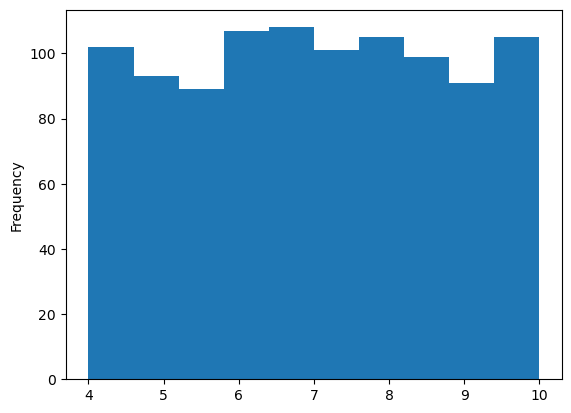

In [27]:
response = query_engine.query("Exiba pra mim um gráfico da distribuição das avaliações")

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.groupby('tipo_produto')['total'].sum().sort_values().plot(kind='barh')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


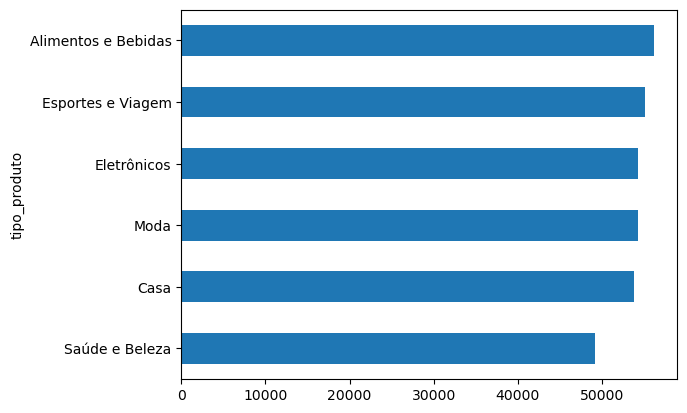

In [28]:
response = query_engine.query("""
    Crie um gráfico da soma do total por tipo_produto ordenando
    do menor para maior e mantenha a barra na horizontal
                              """)